In [1]:
import plotly.graph_objects as go
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import numpy as np
import quandl

In [2]:
start = datetime.datetime(2021,1,1)
end = datetime.date.today()

#df = pd.read_csv('AAPL.csv')
df = web.DataReader( 'AAPl',  'yahoo',  start, end)
#df.to_csv('AAPl.csv')
df.head()
df.shape
#checking if the dataset has any null values
df.isnull().sum()
df.describe()
#df['Date'].max() — df['Date'].min()

,High,Low,Open,Close,Volume,Adj Close
count,329.000000,329.000000,329.000000,329.000000,3.290000e+02,329.000000
mean,148.835046,145.644468,147.208754,147.310304,9.080060e+07,146.866238
std,17.809519,17.288606,17.507689,17.584719,2.740500e+07,17.824611
min,120.400002,116.209999,119.029999,116.360001,4.100000e+07,115.672493
25%,133.039993,130.229996,132.039993,131.960007,7.144740e+07,131.073929
50%,147.710007,145.550003,146.210007,146.389999,8.670910e+07,145.960739
75%,165.119995,159.759995,163.360001,162.949997,1.048186e+08,162.949997
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.778397


import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.plot(df['Adj Close'])

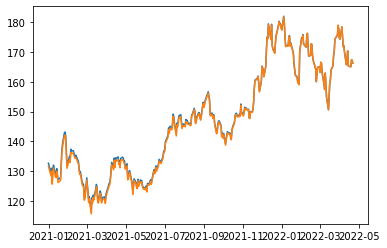

In [3]:


plt.plot(df['Close'])
plt.plot(df['Adj Close'])
#plt.plot(df['AAPL.Close'])
#plt.plot(df['mavg'])




In [4]:
df.reset_index(inplace=True,drop=False)
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.update_layout(paper_bgcolor="black",plot_bgcolor="black")

fig.show()
 

In [5]:
 from pandas_profiling import ProfileReport

In [6]:
#profile = ProfileReport(df)

#profile.to_file(output_file='Stocks1.html')

# denoting the daily returns in the price of the stock

In [7]:
df['Day_Perc_Change'] = df['Adj Close'].pct_change()*100
 
df.dropna(axis =0 , inplace = True)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Day_Perc_Change
1,2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.453461,-2.471913
2,2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.041626,1.236374
3,2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.664223,-3.366155
4,2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.952271,3.412306
5,2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,131.073929,0.863131


<AxesSubplot:>

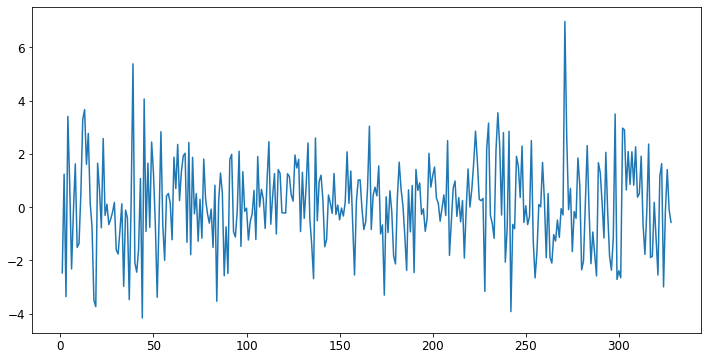

In [8]:
 df['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 12)

C:\Users\prakhar\AppData\Local\Temp\ipykernel_14000\1054008026.py:4: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



count    328.000000
mean       0.084589
std        1.649026
min       -4.167355
25%       -0.917494
50%        0.055747
75%        1.240930
max        6.977762
Name: Day_Perc_Change, dtype: float64

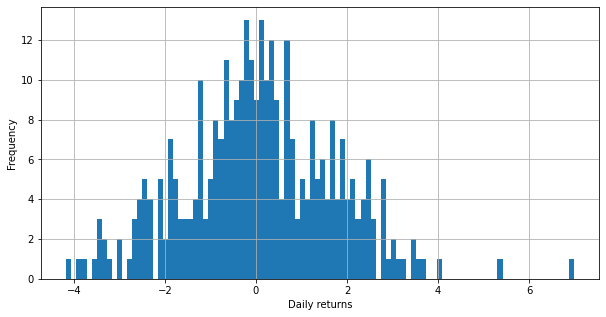

In [9]:
df['Day_Perc_Change'].hist(bins = 100, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
#satistics
df.Day_Perc_Change.describe()

In [10]:
 #The daily returns histogram is centered about origin.
#For the past 2 years, the mean daily returns has been about 0.072 and
#for most of the days the daily return wasless than 1% implying that the APPL
#stock has been less volatile over the period. During the period, 
#the highest % change in positive direction was observed to be 6.97% and was 4.16%
#in negative direction. Clearly, we didn’t had any instances of ‘bull run’ 
#or ‘bear drop’!

In [11]:
# import yfinance as yf
# tickers_list = ['AAPL', 'MSFT', 'GOOG']
# data = pd.DataFrame(columns=tickers_list)
# for ticker in tickers_list:
#     data[ticker] =  web.DataReader( ticker,  'yahoo',  start, end)['Adj Close']
    
# # Print first 5 rows of the data
# data.head

In [12]:
google = web.DataReader( 'GOOG',  'yahoo',  start, end)
apple = web.DataReader( 'AAPL',  'yahoo',  start, end)
microsoft = web.DataReader( 'MSFT',  'yahoo',  start, end)

In [17]:
data = pd.DataFrame()
data['GOOG'] = google['Adj Close']
data['AAPL'] = apple['Adj Close']
data['MSFT'] = microsoft['Adj Close']

In [18]:
data.head()

,GOOG,AAPL,MSFT
Date,,,
2020-12-31,1751.880005,131.709198,220.115967
2021-01-04,1728.239990,128.453445,215.434967
2021-01-05,1740.920044,130.041611,215.642776
2021-01-06,1735.290039,125.664207,210.051300
2021-01-07,1787.250000,129.952271,216.028748


<AxesSubplot:xlabel='Date'>

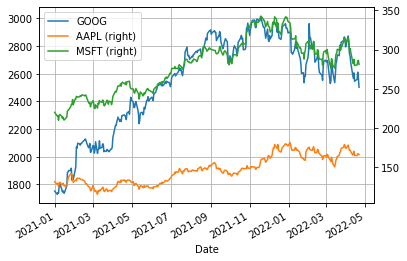

In [19]:
data.plot(secondary_y = ["AAPL", "MSFT"], grid = True)


In [20]:
stock_change = data.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,GOOG,AAPL,MSFT
Date,,,
2020-12-31,NaN,NaN,NaN
2021-01-04,-0.013586,-0.025030,-0.021495
2021-01-05,0.007310,0.012288,0.000964
2021-01-06,-0.003239,-0.034241,-0.026271
2021-01-07,0.029504,0.033554,0.028060


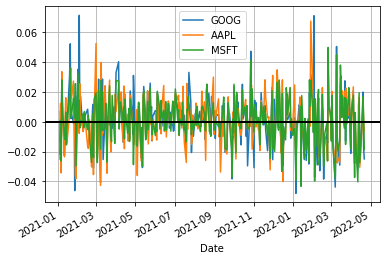

In [21]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2) 

In [22]:
spyder = web.DataReader("SPY", "yahoo", start, end) 

In [23]:
spyder.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,374.660004,371.230011,371.779999,373.880005,78520700.0,367.819183
2021-01-04,375.450012,364.820007,375.309998,368.790009,110210800.0,362.811646
2021-01-05,372.500000,368.049988,368.100006,371.329987,66426200.0,365.310425
2021-01-06,376.980011,369.119995,369.709991,373.549988,107997700.0,367.494476
2021-01-07,379.899994,375.910004,376.100006,379.100006,68766800.0,372.954529


In [24]:
data['SPY'] = spyder['Adj Close']

In [25]:
# comparing it with SPY data
stock_change = data.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,GOOG,AAPL,MSFT,SPY
Date,,,,
2020-12-31,NaN,NaN,NaN,NaN
2021-01-04,-0.013586,-0.025030,-0.021495,-0.013708
2021-01-05,0.007310,0.012288,0.000964,0.006864
2021-01-06,-0.003239,-0.034241,-0.026271,0.005961
2021-01-07,0.029504,0.033554,0.028060,0.014748


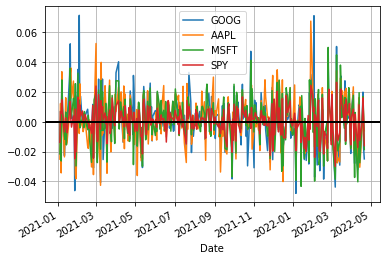

In [26]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2) 

In [27]:
stock_change_apr =  stock_change* 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages
stock_change_apr.tail()

,GOOG,AAPL,MSFT,SPY
Date,,,,
2022-04-14,-593.580177,-767.267229,-691.939572,-315.754267
2022-04-18,139.816271,-33.561249,62.061465,10.358581
2022-04-19,501.108874,353.214562,425.785019,403.546936
2022-04-20,-445.143633,-25.604126,93.454047,-18.693860
2022-04-21,-626.697565,-149.186140,-468.982857,-401.545169


In [28]:
#the risk-free rate, which I denote by r_{RF}, is the rate 
#of return on a risk-free financial asset. This asset exists only in theory
# but often yields on low-risk instruments like 3-month U.S. Treasury Bills can be viewed as being virtually risk-free and thus their yields can be used to approximate the risk-free rate.
tbill = pd.read_csv('./TB3MS.csv', index_col=False)
tbill.head()

,DATE,TB3MS
0,2021-02-01,0.04
1,2021-03-01,0.03
2,2021-04-01,0.02
3,2021-05-01,0.02
4,2021-06-01,0.04


In [29]:
import plotly.express as px
fig = px.line(tbill, x="DATE", y="TB3MS")
fig.show()

In [30]:
rrf = tbill['TB3MS'].iloc[-1]    # Get the most recent Treasury Bill rate
rrf

0.33

In [31]:
smcorr = stock_change_apr.drop("SPY", 1).corrwith(stock_change_apr.SPY)    # Since RRF is constant it doesn't change the
                                                                           # correlation so we can ignore it in our
                                                                           # calculation
smcorr

C:\Users\prakhar\AppData\Local\Temp\ipykernel_14000\2970449786.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



GOOG    0.755722
AAPL    0.741632
MSFT    0.779648
dtype: float64

In [32]:
sy = stock_change_apr.drop("SPY", 1).std()
sx = stock_change_apr.SPY.std()
sy

C:\Users\prakhar\AppData\Local\Temp\ipykernel_14000\1854261323.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



GOOG    421.040190
AAPL    414.758848
MSFT    385.395083
dtype: float64

In [33]:
sx

240.1891931816239

In [34]:
ybar = stock_change_apr.drop("SPY", 1).mean() - rrf
xbar = stock_change_apr.SPY.mean() - rrf
ybar

C:\Users\prakhar\AppData\Local\Temp\ipykernel_14000\739597097.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



GOOG    27.049255
AAPL    17.559968
MSFT    18.453584
dtype: float64

In [35]:
xbar

13.030345862748096

In [36]:
beta = smcorr * sy / sx
alpha = ybar - beta * xbar
beta

GOOG    1.324745
AAPL    1.280651
MSFT    1.250982
dtype: float64

In [37]:
alpha

GOOG    9.787364
AAPL    0.872640
MSFT    2.152851
dtype: float64

In [38]:
sharpe = (ybar - rrf)/sy
sharpe

GOOG    0.063460
AAPL    0.041542
MSFT    0.047026
dtype: float64

In [39]:
(xbar - rrf)/sx

0.052876425015277326